In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:\\Users\\SRIKANTH\\OneDrive\\Desktop\\census-income.csv", skipinitialspace=True)

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.shape


(32561, 15)

In [5]:
data.columns=data.columns.str.strip()
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Unnamed: 14'],
      dtype='object')

In [6]:
data['workclass'].unique()


array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

# data preprocessing


In [7]:
data.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Unnamed: 14       0
dtype: int64

In [8]:
 data.describe().T


,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


# Data Manipulation:
#a) Extract the “education” column and store it in “census_ed” .

In [9]:
census_ed=data.iloc[:,3]
census_ed

0         Bachelors
1         Bachelors
2           HS-grad
3              11th
4         Bachelors
            ...    
32556    Assoc-acdm
32557       HS-grad
32558       HS-grad
32559       HS-grad
32560       HS-grad
Name: education, Length: 32561, dtype: object

# b) Extract all the columns from “age” to “relationship” and store it in “census_seq”.

In [10]:
census_seq=data.iloc[:,0:8]
census_seq

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife
...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child


# c) Extract the column number “5”, “8”, “11” and store it in “census_col”.

In [11]:
census_col=data.iloc[:,[5,8,11]]
census_col

,marital-status,race,capital-loss
0,Never-married,White,0
1,Married-civ-spouse,White,0
2,Divorced,White,0
3,Married-civ-spouse,Black,0
4,Married-civ-spouse,Black,0
...,...,...,...
32556,Married-civ-spouse,White,0
32557,Married-civ-spouse,White,0
32558,Widowed,White,0
32559,Never-married,White,0


# d) Extract all the male employees who work in state-gov and store it in “male_gov

In [12]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
male_gov=data[(data['workclass']=='State-gov') & (data['sex']=='Male')]
male_gov.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
34,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,<=50K
48,41,State-gov,101603,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
123,29,State-gov,267989,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K


# e) Extract all the 39 year olds who either have a bachelor's degree or who are native of the United States and store the result in “census_us”.

In [14]:
census=data[(data['age']==39)]
census_us=census[(census['education']=='Bachelors') | (census['native-country']=='United-States')]

In [15]:
census_us

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
129,39,Private,365739,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
166,39,Federal-gov,235485,Assoc-acdm,12,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,42,United-States,<=50K
320,39,Self-emp-not-inc,174308,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32146,39,Private,117381,Some-college,10,Divorced,Transport-moving,Not-in-family,White,Male,0,0,65,United-States,<=50K
32260,39,Federal-gov,232036,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
32428,39,Federal-gov,110622,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,Female,0,0,40,Philippines,<=50K
32468,39,Self-emp-not-inc,193689,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,65,United-States,<=50K


# f) Extract 200 random rows from the “census” data frame and store it in “census_200”.

In [16]:
census_200=data.sample(200)
census_200


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
17353,25,Private,104746,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,16,United-States,<=50K
29491,39,Private,262158,Bachelors,13,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,<=50K
1719,38,Private,187069,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,45,United-States,<=50K
32524,26,Private,191648,Assoc-acdm,12,Never-married,Machine-op-inspct,Other-relative,White,Female,0,0,15,United-States,<=50K
21121,68,Self-emp-not-inc,234859,Some-college,10,Married-civ-spouse,Other-service,Husband,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16766,35,Private,210150,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
12051,33,Private,130057,Assoc-acdm,12,Never-married,Craft-repair,Not-in-family,White,Male,0,0,45,United-States,<=50K
16551,28,Private,37821,Some-college,10,Divorced,Sales,Unmarried,White,Female,0,0,45,United-States,<=50K
12325,45,Private,187226,Assoc-acdm,12,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K


# g) Get the count of different levels of the “workclass” column.

In [17]:
data[['workclass']].value_counts()


workclass       
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
dtype: int64

# h) Calculate the mean of the “capital.gain” column grouped according to “workclass”.

In [18]:
data.groupby(['workclass'])['capital-gain'].mean()


workclass
?                    606.795752
Federal-gov          833.232292
Local-gov            880.202580
Never-worked           0.000000
Private              889.217792
Self-emp-inc        4875.693548
Self-emp-not-inc    1886.061787
State-gov            701.699538
Without-pay          487.857143
Name: capital-gain, dtype: float64

# i) Create a separate dataframe with the details of males and females from the census data that has income more than 50,000. 

In [19]:
data=pd.read_csv("C:\\Users\\SRIKANTH\\OneDrive\\Desktop\\census-income.csv", skipinitialspace=True)
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [20]:
data.columns=data.columns.str.strip()
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Unnamed: 14'],
      dtype='object')

In [21]:
data['sex'].value_counts()


Male      21790
Female    10771
Name: sex, dtype: int64

In [22]:
data['Unnamed: 14'].value_counts()

<=50K    24720
>50K      7841
Name: Unnamed: 14, dtype: int64

In [23]:
male_50k=data[(data['sex']=='Male') & (data['Unnamed: 14']=='>50K')]
male_50k



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,34,Private,204461,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
32533,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


In [24]:
female_50K=data[(data['sex']=='Female') & (data['Unnamed: 14']=='>50K')]
female_50K


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
19,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K
67,53,Private,169846,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
84,44,Private,343591,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,14344,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32536,34,Private,160216,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,>50K
32538,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K


# j) Calculate the percentage of people from the United States who are private employees and earn less than 50,000 annually. 

In [25]:
states=data[(data['native-country']=='United-States') & (data['workclass']=='Private') &(data['Unnamed: 14']=='<=50K')]


In [26]:
total=len(data)


In [27]:
percentage=(len(states)/total)*100


In [28]:
percentage

47.891649519363654

# k) Calculate the percentage of married people in the census data.

In [29]:
data['marital-status'].value_counts()


Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [30]:
total=len(data['marital-status'])
married=14976+418+23


In [31]:
precentage=(married/total)*100


In [32]:
percentage

47.891649519363654

# l) Calculate the percentage of high school graduates earning more than 50,000 annually. 

In [33]:
data['education'].value_counts()



HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [34]:
school=len(data[(data['education']=='HS-grad') &(data['Unnamed: 14']=='>50K')])



In [35]:
percentage=(school/total)*100
percentage


5.144190903227788

# 3. Linear Regression:
#a) Build a simple linear regression model as follows:
●	Divide the dataset into training and test sets in 70:30 ratio.
●	Build a linear model on the test set where the dependent variable is “hours.per.week” and the independent variable is “education.num”.
●	Predict the values on the train set and find the error in prediction. 
●	Find the root-mean-square error (RMSE).
 



In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [37]:
lr=LinearRegression()


In [38]:
#independent variable is “education.num”.
x=data[['education-num']]
#dependent variable is “hours.per.week”
y=data['hours-per-week']


In [39]:
x

,education-num
0,13
1,13
2,9
3,7
4,13
...,...
32556,12
32557,9
32558,9
32559,9


In [40]:
y

0        40
1        13
2        40
3        40
4        40
         ..
32556    38
32557    40
32558    40
32559    20
32560    40
Name: hours-per-week, Length: 32561, dtype: int64

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [42]:
error=y_test-y_pred


In [43]:
error

9646     30.044869
709     -13.159243
7385      7.432533
16671     0.371349
21932     1.840757
           ...    
29663    -1.832763
29310     0.371349
29661    -0.363355
19491    -1.098059
2861      5.514277
Name: hours-per-week, Length: 9769, dtype: float64

In [44]:
print('mean_squared_error :',mean_squared_error(y_test,y_pred))

print('root-mean-square error :',np.sqrt(mean_squared_error(y_test,y_pred)))

mean_squared_error : 147.15261838664162
root-mean-square error : 12.130647896408568


# 4. Logistic Regression:
 a) Build a simple logistic regression model as follows:
●	Divide the dataset into training and test sets in 65:35 ratio.
●	Build a logistic regression model where the dependent variable is “X”(yearly income) and the independent variable is “occupation”.
●	Predict the values on the test set.
●	Build a confusion matrix and find the accuracy.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [46]:
lo=LogisticRegression()


In [47]:
data.shape

(32561, 15)

In [48]:
data[['occupation']].value_counts()



occupation       
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
dtype: int64

In [49]:
#occupation is indpendent

x=data['occupation'].replace('?','Prof-specialty')
x=pd.DataFrame(x)

In [50]:
data['Unnamed: 14'].value_counts()


<=50K    24720
>50K      7841
Name: Unnamed: 14, dtype: int64

In [51]:
#income is dependent

y=data['Unnamed: 14'].replace('<=50K',0).replace('>50K',1)
y.value_counts()

0    24720
1     7841
Name: Unnamed: 14, dtype: int64

In [52]:
# income
#data.income = df.Unnamed: 14.replace('<=50K', 0)
#data.income = df.Unnamed: 14.replace('>50K', 1)

In [53]:
le=LabelEncoder()


In [54]:
x=le.fit_transform(x)


C:\Users\SRIKANTH\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [55]:
x=pd.DataFrame(x)



In [56]:
x

,0
0,0
1,3
2,5
3,5
4,9
...,...
32556,12
32557,6
32558,0
32559,0


In [57]:
x.value_counts()


9     5983
2     4099
3     4066
0     3770
11    3650
7     3295
6     2002
13    1597
5     1370
4      994
12     928
10     649
8      149
1        9
dtype: int64

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.35,random_state=1)
lo=LogisticRegression()
lo.fit(x_train,y_train)
y_pred=lo.predict(x_test)

print('confusion_matrix :')
print(confusion_matrix(y_pred,y_test))
print('accuracy_score :',accuracy_score(y_test,y_pred))

confusion_matrix :
[[8800 2597]
 [   0    0]]
accuracy_score : 0.7721330174607353


# b)Build a multiple logistic regression model as follows:
#●-	Divide the dataset into training and test sets in 80:20 ratio.
#●-	Build a logistic regression model where the dependent variable is “X”(yearly income) and independent variables are “age”, “workclass”, and “education”.
#●-	Predict the values on the test set.
#●-	Build a confusion matrix and find the accuracy

In [59]:
data.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [60]:
#independent

c=data[['age','workclass','education']]

In [61]:
c

,age,workclass,education
0,39,State-gov,Bachelors
1,50,Self-emp-not-inc,Bachelors
2,38,Private,HS-grad
3,53,Private,11th
4,28,Private,Bachelors
...,...,...,...
32556,27,Private,Assoc-acdm
32557,40,Private,HS-grad
32558,58,Private,HS-grad
32559,22,Private,HS-grad


In [62]:
c['workclass']=c['workclass'].replace('?','Private')


<ipython-input-62-af2ecb2818e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['workclass']=c['workclass'].replace('?','Private')


In [63]:
c=c.apply(le.fit_transform)


In [64]:
c

,age,workclass,education
0,22,6,9
1,33,5,9
2,21,3,11
3,36,3,1
4,11,3,9
...,...,...,...
32556,10,3,7
32557,23,3,11
32558,41,3,11
32559,5,3,11


In [65]:
#income is dependent

y=data['Unnamed: 14'].replace('<=50K',0).replace('>50K',1)
y.value_counts()

0    24720
1     7841
Name: Unnamed: 14, dtype: int64

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=1)
lo=LogisticRegression()
lo.fit(x_train,y_train)
y_pred=lo.predict(x_test)

print('confusion_matrix :')
print(confusion_matrix(y_pred,y_test))
print('accuracy_score :',accuracy_score(y_test,y_pred))

confusion_matrix :
[[5026 1487]
 [   0    0]]
accuracy_score : 0.7716873944418855


# 5. Decision Tree:

a) Build a decision tree model as follows:

●	Divide the dataset into training and test sets in 70:30 ratio.
●	Build a decision tree model where the dependent variable is “X”(Yearly Income) and the rest of the variables as independent variables.
●	Predict the values on the test set.
●	Build a confusion matrix and calculate the accuracy.

In [67]:
from sklearn.tree import DecisionTreeClassifier


In [68]:
data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [69]:
# education Category
data.education= data.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
data.education = data.education.replace('HS-grad', 'high school')
data.education = data.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
data.education = data.education.replace('Bachelors', 'undergrad')
data.education = data.education.replace('Masters', 'grad')
data.education = data.education.replace('Doctorate', 'doc')

In [70]:
#martial status
data['marital.status']= data['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
data['marital.status']= data['marital-status'].replace(['Never-married'], 'not-married')
data['marital.status']= data['marital-status'].replace(['Divorced', 'Separated','Widowed','Married-spouse-absent'], 'other')

In [71]:
# income
income = data['Unnamed: 14'].replace('<=50K', 0)    
income = data['Unnamed: 14'].replace('<=50K', 1)                 

In [72]:
#?
data['workclass']=data['workclass'].replace('?','Private')
data['occupation']=data['occupation'].replace('?','Prof-specialty')
data['native-country']=data['native-country'].replace('?','United-States')

In [73]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14,marital.status
0,39,State-gov,77516,undergrad,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Never-married
1,50,Self-emp-not-inc,83311,undergrad,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Married-civ-spouse
2,38,Private,215646,high school,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,other
3,53,Private,234721,school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Married-civ-spouse
4,28,Private,338409,undergrad,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Married-civ-spouse


In [74]:
#columns transfer

In [75]:
backup=data.copy()


In [76]:
data=data.apply(le.fit_transform)
data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14,marital.status
0,22,6,2671,5,12,4,0,1,4,1,25,0,39,38,0,2
1,33,5,2926,5,12,2,3,0,4,1,0,0,12,38,0,1
2,21,3,14086,2,8,0,5,1,4,1,0,0,39,38,0,3
3,36,3,15336,4,6,2,5,0,2,1,0,0,39,38,0,1
4,11,3,19355,5,12,2,9,5,2,0,0,0,39,4,0,1


In [77]:
#independent
x=data.iloc[:,:-1]
#dependent
y=data.iloc[:,-1]

In [78]:
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,22,6,2671,5,12,4,0,1,4,1,25,0,39,38,0
1,33,5,2926,5,12,2,3,0,4,1,0,0,12,38,0
2,21,3,14086,2,8,0,5,1,4,1,0,0,39,38,0
3,36,3,15336,4,6,2,5,0,2,1,0,0,39,38,0
4,11,3,19355,5,12,2,9,5,2,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,3,16528,3,11,2,12,5,4,0,0,0,37,38,0
32557,23,3,8080,2,8,2,6,0,4,1,0,0,39,38,1
32558,41,3,7883,2,8,6,0,4,4,0,0,0,39,38,0
32559,5,3,12881,2,8,4,0,3,4,1,0,0,19,38,0


In [79]:
y

0        2
1        1
2        3
3        1
4        1
        ..
32556    1
32557    1
32558    3
32559    2
32560    1
Name: marital.status, Length: 32561, dtype: int32

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

print('confusion_matrix :')
print(confusion_matrix(y_pred,y_test))
print('accuracy_score :',accuracy_score(y_test,y_pred))

confusion_matrix :
[[   8    0    0    0]
 [   0 4430    0    0]
 [   0    0 3212    0]
 [   0    0    0 2119]]
accuracy_score : 1.0


# random forest
#a) Build a random forest model as follows:
●	Divide the dataset into training and test sets in 80:20 ratio.
●	Build a random forest model where the dependent variable is “X”(Yearly Income) and the rest of the variables as independent variables and number of trees as 300.
●	Predict values on the test set
●	Build a confusion matrix and calculate the accuracy

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=1)
rf=RandomForestClassifier(n_estimators=300)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

print('confusion_matrix :')
print(confusion_matrix(y_pred,y_test))
print('accuracy_score :',accuracy_score(y_test,y_pred))

confusion_matrix :
[[   1    0    0    0]
 [   3 2993    0    0]
 [   0    0 2129    0]
 [   0    0    0 1387]]
accuracy_score : 0.9995393827729157


# 7. For this problem, use the population dataset, and perform the following:
.EDA on the time series to find trends and seasonality.
.Forecast the population on the given dataset for the next 6 months.

In [83]:
df=pd.read_csv("C:\\Users\\SRIKANTH\\OneDrive\\Desktop\\popdata.csv")

In [90]:
df

,value,date
0,127299.000,1952-01-01
1,127517.000,1952-02-01
2,127721.000,1952-03-01
3,127933.000,1952-04-01
4,128130.000,1952-05-01
...,...,...
811,300581.333,2019-08-01
812,300775.872,2019-09-01
813,300972.035,2019-10-01
814,301144.949,2019-11-01


In [84]:
df.head

<bound method NDFrame.head of           value        date
0    127299.000  1952-01-01
1    127517.000  1952-02-01
2    127721.000  1952-03-01
3    127933.000  1952-04-01
4    128130.000  1952-05-01
..          ...         ...
811  300581.333  2019-08-01
812  300775.872  2019-09-01
813  300972.035  2019-10-01
814  301144.949  2019-11-01
815  301299.946  2019-12-01

[816 rows x 2 columns]>

In [85]:
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [86]:
df.isnull().sum()


value    0
date     0
dtype: int64

Text(0, 0.5, 'value')

<Figure size 1440x720 with 0 Axes>

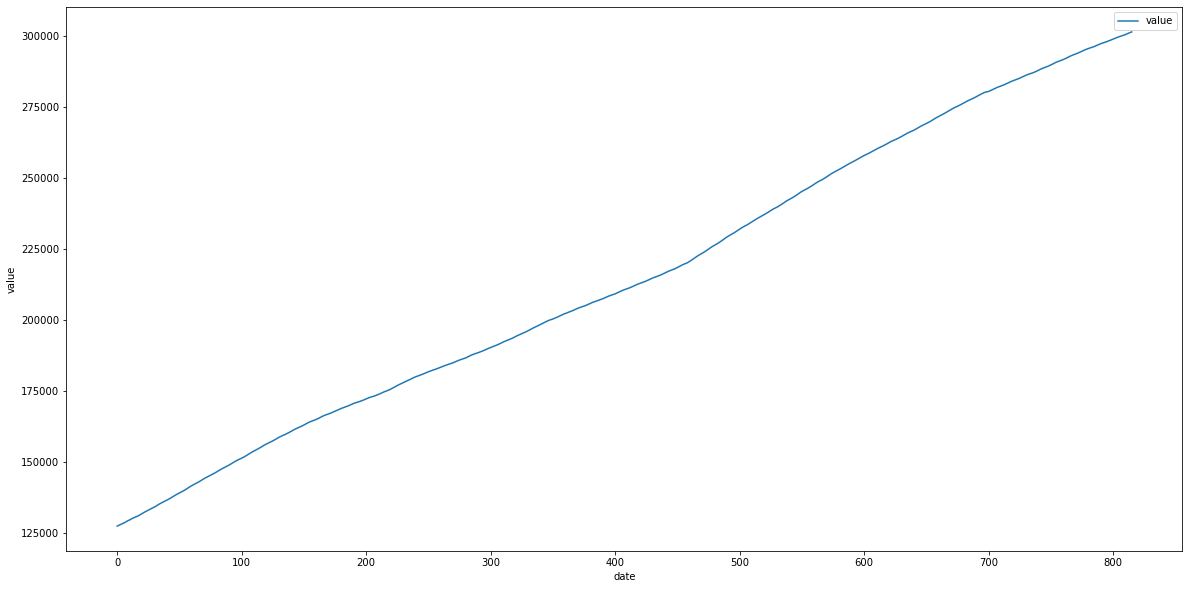

In [100]:
plt.figure(figsize=(20,10))
df.plot(figsize=(20,10))
plt.xlabel('date')
plt.ylabel('value')

In [92]:
#rolmean and rolstd

rolmean=df.rolling(window=12).mean()
rolstd=df.rolling(window=12).std()
print(rolmean.head(20))
print(rolstd.head(20))

            value
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11  128482.583333
12  128704.583333
13  128924.833333
14  129143.000000
15  129360.750000
16  129577.833333
17  129795.583333
18  130014.833333
19  130235.750000
         value
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11  794.979526
12  806.297538
13  813.356439
14  812.209556
15  808.582163
16  797.733817
17  783.550249
18  769.160207
19  765.456622
